In [1]:
import pandas as pd

df = pd.read_csv (r'~/Downloads/values.csv')

In [45]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [2]:
df.describe()

,a,b,c
count,2.930000e+02,293.000000,293.000000
mean,-3.793106e-06,0.097745,-532.208275
std,9.057253e-07,0.017059,87.844236
min,-1.191466e-05,0.062540,-1112.948629
25%,-4.243026e-06,0.086497,-582.197177
50%,-3.729551e-06,0.096546,-526.825773
75%,-3.183655e-06,0.107152,-475.494365
max,-1.884254e-06,0.237608,-363.625559


# Load Values From File

In [90]:
import glob
import numpy as np

path = r'../data_tue/*' # use your path
all_folders = glob.glob(path)


li = []
df_out=pd.DataFrame(columns=['id','real_temp','adc_value'])
df_out_id=pd.DataFrame(columns=['id','tmp_l','adc_l','tmp_m','adc_m','tmp_h','adc_h'])

# dl=pd.DataFrame(columns=['real_temp','header','frimware_adc','col4','col5','col6','col7','col8','col9','col10','col11','col12','col3','col4','col15'])
i=1
j=1
l=1
for folder in all_folders:
    df=pd.read_csv(folder+'/data.txt', index_col=None, header=None)
    np_low_temp=np.array([])
    np_low_adc=np.array([])
    np_high_temp=np.array([])
    np_high_adc=np.array([])
    np_mid_temp=np.array([])
    np_mid_adc=np.array([])
    for row in df.iterrows():
        try:
            if row[1][3]==265:
                df_out.loc[i]=folder.split('/')[2],float(row[1][0]),float(row[1][5])
            else:
                df_out.loc[i]=folder.split('/')[2],float(row[1][0]),float(row[1][6])
            if df_out.loc[i]['real_temp']<10:
                np_low_temp = np.append(np_low_temp, df_out.loc[i]['real_temp'])
                np_low_adc = np.append(np_low_adc, df_out.loc[i]['adc_value'])
            elif df_out.loc[i]['real_temp']>60:
                np_high_temp = np.append(np_high_temp, df_out.loc[i]['real_temp'])
                np_high_adc = np.append(np_high_adc, df_out.loc[i]['adc_value'])
            else:
                np_mid_temp =  np.append(np_mid_temp, df_out.loc[i]['real_temp'])
                np_mid_adc =  np.append(np_mid_adc, df_out.loc[i]['adc_value'])
            i+=1
        except:
            print (bcolors.WARNING + "Warning: There has Been an error with ID:  "+str(folder.split('/')[2])+ bcolors.ENDC)
    
    df_out_id.loc[l]= folder.split('/')[2],np.average(np_low_temp),np.average(np_low_adc),np.average(np_mid_temp),np.average(np_mid_adc),np.average(np_high_temp),np.average(np_high_adc)
    
    l+=1
    if j%50 == 0:
#         print (bcolors.WARNING+"Printing ID:  "+str(folder.split('/')[2])+bcolors.ENDC)
        print ("Loading file number:........."+str(j))
    j+=1
    #     df = pd.read_csv(folder+'/data.txt', index_col=None, header=0)
# frame = pd.concat(li, axis=0, ignore_index=True)

/Users/rbol384/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/rbol384/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Loading file number:.........50
Loading file number:.........100
Loading file number:.........150
Loading file number:.........200
Loading file number:.........250


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1308534a8>,
      dtype=object)

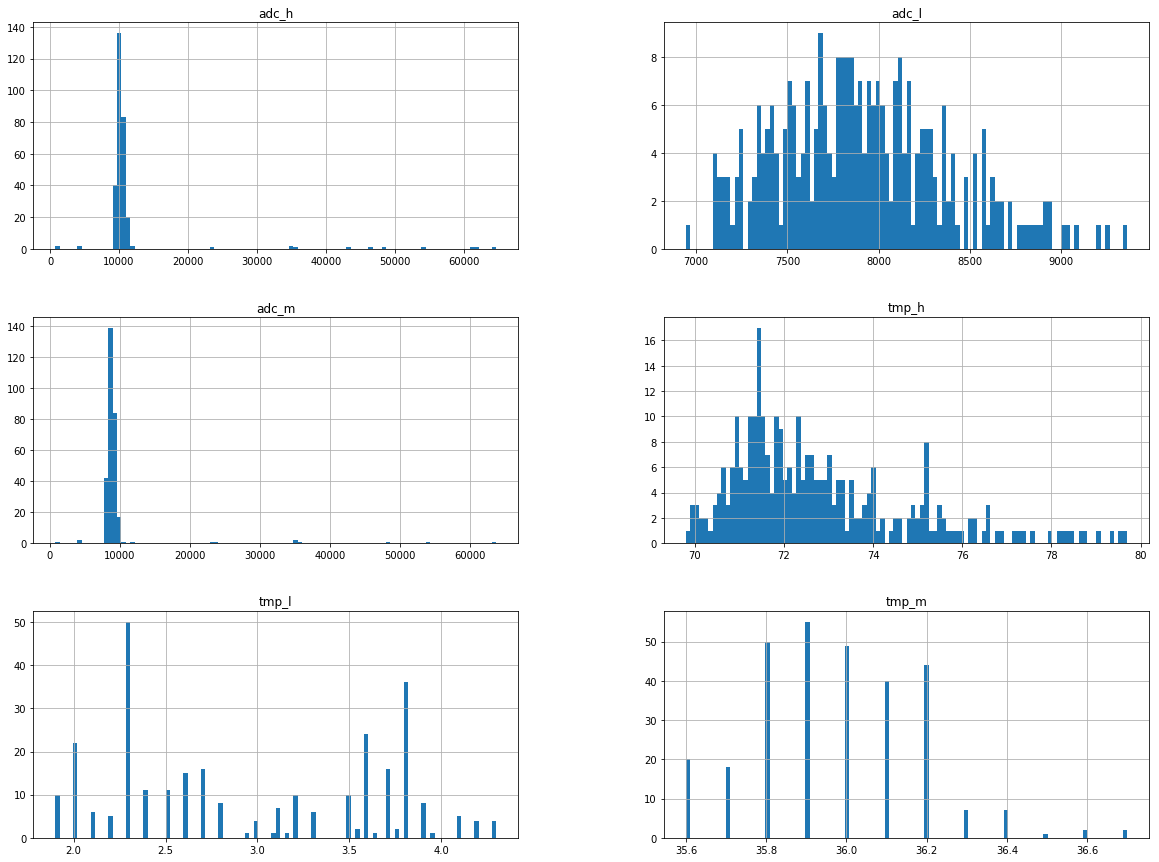

In [93]:
df_out_id.hist(bins=100, figsize=(20,15))

In [100]:
attributes = ["adc_l", "adc_h", "adc_m"]
scatter_matrix(df_out_id[attributes], figsize=(12, 8))

NameError: name 'scatter_matrix' is not defined

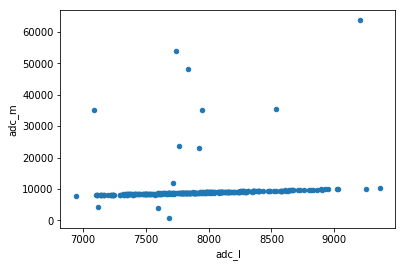

In [99]:
df_out_id.plot(kind="scatter", x="adc_l", y="adc_m")

In [49]:
df_out['adc_value'].describe()

count    24718.000000
mean      9633.271583
std       5444.119012
min        757.000000
25%       8080.000000
50%       8792.000000
75%       9998.000000
max      64742.000000
Name: adc_value, dtype: float64

In [50]:
folder.split('/')[2]

'DWACYC0NGZFQN4ZKYPM3JP3ZWR'

In [51]:
df_out['id'].describe()

count                          24718
unique                           299
top       NSCAJ8NZT6BFL7J8KXSFQX6C2Y
freq                             109
Name: id, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ce8d2b0>,
      dtype=object)

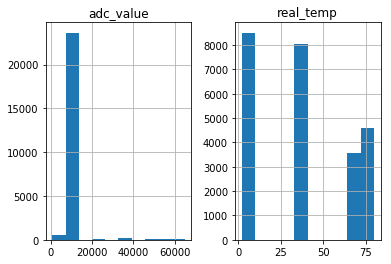

In [52]:
df_out.hist()

In [53]:
df_out['real_temp'].describe()

count    24718.000000
mean        36.761138
std         28.688238
min          1.900000
25%          3.600000
50%         35.900000
75%         71.300000
max         79.700000
Name: real_temp, dtype: float64

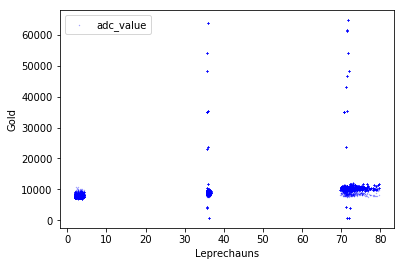

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility

x = df_out['real_temp']
y = df_out['adc_value']
# s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s=0.1, c="b", alpha=0.5)
plt.xlabel("Leprechauns")
plt.ylabel("Gold")
plt.legend(loc='upper left')
plt.show()

In [69]:
df_out.loc('id'=="BHG2WDMA8C2DVJ7C27B3DNQZGT")

ValueError: No axis named False for object type <class 'pandas.core.frame.DataFrame'>

In [65]:
df_out.loc[1]['id']

'BHG2WDMA8C2DVJ7C27B3DNQZGT'